# Topic Models with LDA

In this exercise, we will learn how to apply and visualize topic models in Python. 
We will use the package `sklearn`.


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words as stop_words
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

import matplotlib.pyplot as plt

## Exercise 1: processing bag of words representation and analyze results

We start with a toy example to illustrate how to preprocess and visualize data. Consider a set of four documents, each consisting of one single sentence:

In [2]:
doc1 = "I like to eat broccoli and bananas; Broccoli and bananas are healthy."
doc2 = "I eat broccoli smoothie and bananas for breakfast."
doc3 = "Hamsters and kittens are cute."
doc4 = "My sister says she wants to adopt two cute kittens, but we already have three hamsters at home."

# complete list of documents
doc_complete = [doc1, doc2, doc3, doc4]

### Point a) Tokenize the document. 
These are the steps that this is doing:
1. Remove punctuation.
2. Remove "stop words".
3. Remove low-frequency words.
4. Create the dictionary.
5. Create the bag-of-words representation.

In [3]:
list_stop = list(stop_words.ENGLISH_STOP_WORDS)

### Stemming

In [4]:
def tokenize_documents(documents,stoplist,max_df0=0.80, min_df0=0.02,print_vocabulary=False,outfolder=None,output_vocabulary_fname='vocabulary.dat'):
    '''
    From a list of documents raw text build a matrix DxV
    D: number of docs
    V: size of the vocabulary, i.e. number of unique terms found in the whole set of docs
    '''
    count_vect = CountVectorizer(stop_words=stoplist,max_df=max_df0, min_df=min_df0)
    corpus = count_vect.fit_transform([d for d in documents])

    vocabulary_dict=count_vect.vocabulary_.items()
    vocabulary_list=[(key,value) for key,value in vocabulary_dict]
    vocabulary_list.sort(key=lambda x: x[1])

    if print_vocabulary==True:output_vocabulary(outfolder,count_vect,outfile=output_vocabulary_fname)
    return corpus,vocabulary_list,vocabulary_dict,count_vect

In [5]:
corpus,vocabulary_list,vocabulary_dict,count_vect=tokenize_documents(doc_complete,stoplist=list_stop)
print(corpus.shape, len(vocabulary_list))

(4, 15) 15


In [6]:
D,V=corpus.shape
D,V

(4, 15)

In [7]:
corpus.toarray()

array([[0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1]])

In [8]:
vocabulary_list

[('adopt', 0),
 ('bananas', 1),
 ('breakfast', 2),
 ('broccoli', 3),
 ('cute', 4),
 ('eat', 5),
 ('hamsters', 6),
 ('healthy', 7),
 ('home', 8),
 ('kittens', 9),
 ('like', 10),
 ('says', 11),
 ('sister', 12),
 ('smoothie', 13),
 ('wants', 14)]

### Point b) run LDA

We now apply Latent Dirichlet Allocation (LDA) to our preprocessed corpus. The idea behind LDA is that each document can be understood as a mixture of "topics". For instance, documents 1 and 2 are about food because they contain the words "broccoli", "bananas", and "eat"; documents 3 and 4 are about animals ("kittens", "hamsters", "cute"); and document 5 is about both animals ("hamsters") and food ("broccoli"). LDA unveils these topics automatically from the data.



In [9]:
# Fit LDA
n_topics = 2
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='batch', max_iter=200, evaluate_every=10, perp_tol=0.01, verbose=1)#, doc_topic_prior=1.0, topic_word_prior=1.0)
topic_proportions = lda_model.fit_transform(corpus)
topics = lda_model.components_ / lda_model.components_.sum(axis=1)[:, np.newaxis]

# Print log-likelihood
print('\nLog likelihood: ' + str(lda_model.score(corpus)))

iteration: 1 of max_iter: 200
iteration: 2 of max_iter: 200
iteration: 3 of max_iter: 200
iteration: 4 of max_iter: 200
iteration: 5 of max_iter: 200
iteration: 6 of max_iter: 200
iteration: 7 of max_iter: 200
iteration: 8 of max_iter: 200
iteration: 9 of max_iter: 200
iteration: 10 of max_iter: 200, perplexity: 20.5928
iteration: 11 of max_iter: 200
iteration: 12 of max_iter: 200
iteration: 13 of max_iter: 200
iteration: 14 of max_iter: 200
iteration: 15 of max_iter: 200
iteration: 16 of max_iter: 200
iteration: 17 of max_iter: 200
iteration: 18 of max_iter: 200
iteration: 19 of max_iter: 200
iteration: 20 of max_iter: 200, perplexity: 20.5928

Log likelihood: -69.57366920909885


In [10]:
topic_proportions

array([[0.06400314, 0.93599686],
       [0.08567386, 0.91432614],
       [0.87252056, 0.12747944],
       [0.94264496, 0.05735504]])

In [11]:
topics

array([[0.0809479 , 0.02722347, 0.02726423, 0.02722347, 0.13488773,
        0.02723443, 0.13488773, 0.02719375, 0.0809479 , 0.13488773,
        0.02719375, 0.0809479 , 0.0809479 , 0.02726423, 0.0809479 ],
       [0.02576738, 0.1793008 , 0.07669804, 0.1793008 , 0.02587576,
        0.12800835, 0.02587576, 0.0767649 , 0.02576738, 0.02587576,
        0.0767649 , 0.02576738, 0.02576738, 0.07669804, 0.02576738]])

### Point c) Analyze the topics



In [12]:
# Check the size of the resulting matrices
print(topic_proportions.shape)   # D x K
print(topics.shape)              # K x V

(4, 2)
(2, 15)


In general, one of the topics will mainly express the words "broccoli", "eat", and "bananas" with higher percentage, whereas the other topic will be mostly about "cute", "hamsters", and "kittens". This is consistent with our earlier intuitions of having a topic about animals and another topic about food.

Recall that a topic is formally defined as a distribution over the entire vocabulary.

### Obtain the topic proportions

We now want to find the topic proportions of each individual document. For instance, we know that document 1 is mostly about food, while document 4 is mostly about animals. The following commands allow us to obtain the topic distribution of each document.

In [13]:
# Build id2term (inverse dictionary)
id2term = {v: k for k, v in vocabulary_dict}


In [14]:
# Visualize topics
n_max = 5
for kk in range(n_topics):
    print('+ Topic ' + str(kk) + ':')
    idx = np.argsort(-topics[kk,:])
    print_str = ''
    for nn in range(n_max):
        print_str += id2term[idx[nn]] + ' '
    print('   ' + print_str)

+ Topic 0:
   cute hamsters kittens adopt home 
+ Topic 1:
   bananas broccoli eat healthy like 


In [15]:
for d in range(D):
    print(d,topic_proportions[d])

0 [0.06400314 0.93599686]
1 [0.08567386 0.91432614]
2 [0.87252056 0.12747944]
3 [0.94264496 0.05735504]


The 1st and 2nd documents are mostly about food. The remianing two are instead about animals.

### Point d) Apply to new documents.

Note that this can be applied to unseen documents too. For instance, consider the following new document, which is about both animals and food:

In [16]:
doc5 = "Look at these hamsters munching on a piece of broccoli".lower()
doc5_tokenized=count_vect.transform([doc5])
print(doc5_tokenized.shape)
doc5_tokenized

(1, 15)


<1x15 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [17]:
lda_model.transform(doc5_tokenized)

array([[0.49362613, 0.50637387]])

The resulting topic proportions should be around $0.5$ (at least moderately close; keep in mind that these are all very short documents), indicating that this document expresses both topics.

### Point e) Visualize results

### Show topics over document

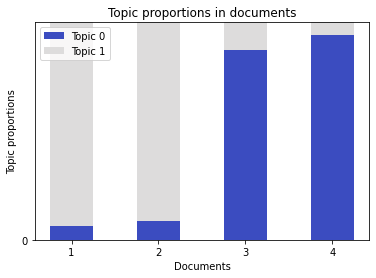

In [18]:
plt.figure()
idx_D = np.arange(D)   # x-axis locations
bar_width = 0.5
plots = []
height_cumulative = np.zeros(D)
for kk in range(n_topics):
    color = plt.cm.coolwarm(kk/n_topics, 1)
    if kk==0:
        p = plt.bar(idx_D, topic_proportions[:, kk], bar_width, color=color)
    else:
        p = plt.bar(idx_D, topic_proportions[:, kk], bar_width, bottom=height_cumulative, color=color)
    height_cumulative += topic_proportions[:, kk]
    plots.append(p)
plt.ylim((0, 1))  # proportions sum to 1
plt.ylabel('Topic proportions')
plt.title('Topic proportions in documents')
plt.yticks(np.arange(0, 1, 10))
plt.xticks([0,1,2,3], labels=[1,2,3,4])
plt.xlabel('Documents')
topic_labels = ['Topic {}'.format(kk) for kk in range(n_topics)]
plt.legend([p[0] for p in plots], topic_labels)
plt.show()

### Visualize heatmap

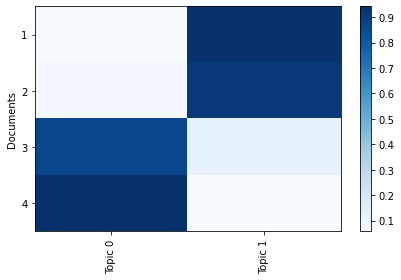

In [19]:
plt.figure()
plt.pcolor(topic_proportions, norm=None, cmap='Blues')
topic_labels = ['Topic {}'.format(kk) for kk in range(n_topics)]
plt.xticks(np.arange(topic_proportions.shape[1])+0.5, topic_labels)
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.yticks(np.arange(topic_proportions.shape[0])+0.5, [1,2,3,4])
plt.ylabel('Documents')
plt.colorbar()
plt.tight_layout()
plt.show()

### Plot topic proportions individually




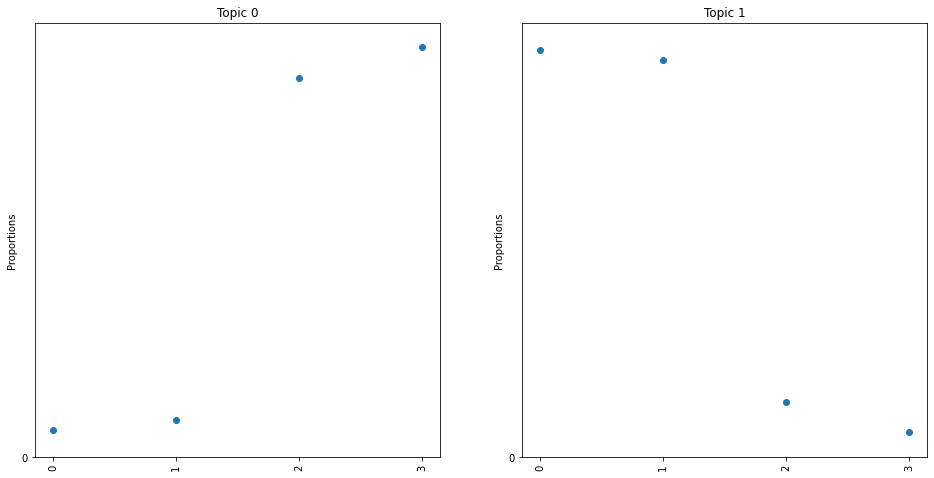

In [20]:
plt.figure(figsize=(16,8))
for kk in range(n_topics):
    plt.subplot(1, 2, kk+1)
    plt.scatter(np.arange(D), topic_proportions[:, kk])
    plt.ylim((0, 1))
    plt.ylabel('Proportions')
    plt.title('Topic '+str(kk))
    if kk+2>=n_topics:
        plt.xticks(np.arange(D), [d for d in range(D)] )
        plt.xticks(rotation=90)
        plt.yticks(np.arange(0, 1, 10))
plt.show() 

### Show words over topic

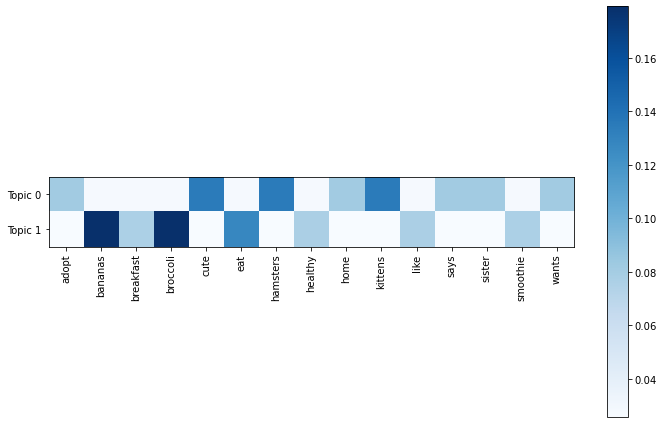

In [21]:
words = [x[0] for x in vocabulary_list]
plt.figure(figsize=(10,6))
plt.imshow(topics, cmap='Blues')
plt.xticks(np.arange(V), labels=words, rotation=90)
plt.yticks(np.arange(topic_proportions.shape[1]), ['Topic 0', 'Topic 1'])
plt.colorbar()
plt.tight_layout()
plt.show()

## Exercise 2: analyze real dataset of NY Times articles


Run a bash script from terminal:  
`    tail -n +4 docword.nytimes.txt > nytimes.txt`  
This will remove the first 3 lines from the file.  
The format of `nytimes.txt` is 3 columns:  
* 1st : document id
* 2nd : word id
* 3rd : frequency of word in that document  
For instance the first lines are:  
`1 413 1
1 534 1
1 2340 1
1 2806 1
1 3059 1
1 3070 1
1 3294 1`

### Import corpus

In [22]:
df0=pd.read_csv('nytimes.txt',sep='\s+', header=None,names=['docId','wordId','wordFreq'])
df0.head()

,docId,wordId,wordFreq
0,1,413,1
1,1,534,1
2,1,2340,1
3,1,2806,1
4,1,3059,1


Reduce the dataset size to speed up implementation.

In [23]:
max_D=1000

In [24]:
df=df0[df0.docId<=max_D]

In [25]:
D=max(df.docId.unique())
V=max(df.wordId.unique())
D,V

(1000, 102656)

Transform into a sparse matrix

In [26]:
corpus_nyt=csr_matrix((df.wordFreq.values, (df.docId.values-1, df.wordId.values-1)), shape=(D, V))
corpus_nyt.data

array([1, 1, 1, ..., 1, 6, 1])

In [27]:
corpus.nonzero()

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
       dtype=int32),
 array([10,  5,  3,  1,  7,  5,  3,  1, 13,  2,  6,  9,  4,  6,  9,  4, 12,
        11, 14,  0,  8], dtype=int32))

### Import vocabulary

In [28]:
df_voc=pd.read_csv('vocab.nytimes.txt',header=None)
df_voc.head()

,0
0,aah
1,aahed
2,aaron
3,aback
4,abacus


In [29]:
# Fit LDA
n_topics = 100
lda_model_nyt = LatentDirichletAllocation(n_components=n_topics, learning_method='batch', max_iter=200, evaluate_every=10, perp_tol=0.01, verbose=1)#, doc_topic_prior=1.0, topic_word_prior=1.0)
topic_proportions = lda_model_nyt.fit_transform(corpus_nyt)
topics = lda_model_nyt.components_ / lda_model_nyt.components_.sum(axis=1)[:, np.newaxis]

# Print log-likelihood
print('\nLog likelihood: ' + str(lda_model_nyt.score(corpus_nyt)))

iteration: 1 of max_iter: 200
iteration: 2 of max_iter: 200
iteration: 3 of max_iter: 200
iteration: 4 of max_iter: 200
iteration: 5 of max_iter: 200
iteration: 6 of max_iter: 200
iteration: 7 of max_iter: 200
iteration: 8 of max_iter: 200
iteration: 9 of max_iter: 200
iteration: 10 of max_iter: 200, perplexity: 8557.9452
iteration: 11 of max_iter: 200
iteration: 12 of max_iter: 200
iteration: 13 of max_iter: 200
iteration: 14 of max_iter: 200
iteration: 15 of max_iter: 200
iteration: 16 of max_iter: 200
iteration: 17 of max_iter: 200
iteration: 18 of max_iter: 200
iteration: 19 of max_iter: 200
iteration: 20 of max_iter: 200, perplexity: 8009.6542
iteration: 21 of max_iter: 200
iteration: 22 of max_iter: 200
iteration: 23 of max_iter: 200
iteration: 24 of max_iter: 200
iteration: 25 of max_iter: 200
iteration: 26 of max_iter: 200
iteration: 27 of max_iter: 200
iteration: 28 of max_iter: 200
iteration: 29 of max_iter: 200
iteration: 30 of max_iter: 200, perplexity: 7813.6468
iteration:

### Topic proportions

Documents with mostly one topic only

In [30]:
from collections import Counter

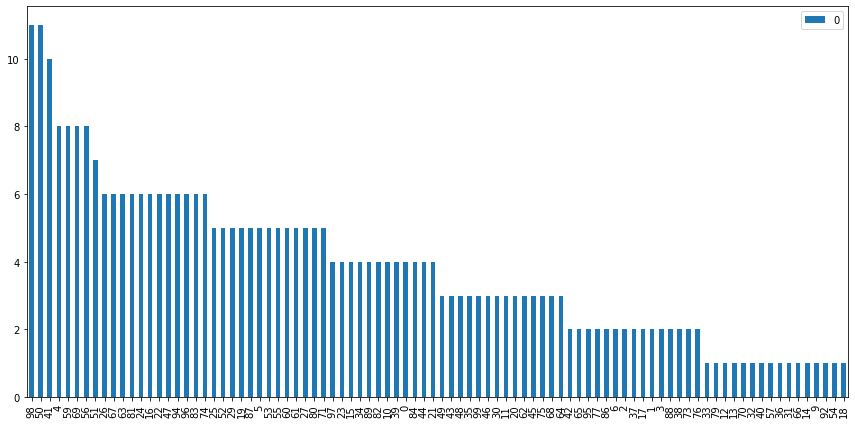

In [31]:
threshold=0.98
docs_one_topic=[d for d in range(D) if max(topic_proportions[d])>threshold]
main_topics=[np.argmax(topic_proportions[d]) for d in docs_one_topic]
main_topics_histo=Counter(main_topics)

df_topics_histo = pd.DataFrame.from_dict(main_topics_histo, orient='index')
df_topics_histo=df_topics_histo.sort_values(by=[0],ascending=False) 
df_topics_histo.plot(kind='bar',figsize=(12,6))
plt.tight_layout()

### Visualize main topics

In [32]:
# Visualize topics
max_topics=list(df_topics_histo.iloc[:5].index)
n_max = 10
for kk in max_topics:
    print('+ Topic ' + str(kk) + ':')
    idx = np.argsort(-topics[kk,:])
    print_str = ''
    main_words_in_this_topic=list(np.concatenate([df_voc.iloc[idx[nn]].values for nn in range(n_max)]))
#     a=list(np.concatenate(a))
    print(main_words_in_this_topic)
    print()

+ Topic 98:
['million', 'games', 'hispanic', 'zzz_black', 'lawmaker', 'internet', 'program', 'newspaper', 'document', 'put']

+ Topic 50:
['zzz_bleated_nato', 'zzz_serb', 'zzz_kosovo', 'war', 'albanian', 'journalist', 'zzz_church', 'zzz_kfor', 'troop', 'zzz_pristina']

+ Topic 41:
['zzz_rwanda', 'zzz_tutsi', 'zzz_hutu', 'zzz_burundi', 'ethnic', 'million', 'zzz_africa', 'zzz_comb', 'hatred', 'group']

+ Topic 4:
['camp', 'driver', 'car', 'system', 'boot', 'computer', 'control', 'juvenile', 'states', 'monitor']

+ Topic 59:
['zzz_will_putin', 'political', 'election', 'zzz_kremlin', 'zzz_boris_yeltsin', 'pro', 'zzz_arizona_democrat', 'zzz_reform_party', 'zzz_russia', 'country']



### Visualize one doc that has only one topic.  
Pick one that has a topic among the most frequent ones.

In [33]:
t=max_topics[0]
possible_d=[d for d in docs_one_topic if np.argmax(topic_proportions[d])==t]
sample_d=np.random.choice(possible_d)
print('Chosen doc:',sample_d)

Chosen doc: 121


In [34]:
sample_d += 1

In [35]:
df_sample_d=df[df.docId==sample_d].sort_values(by=['wordFreq'],ascending=False)
main_wordsId_in_this_doc=df_sample_d.iloc[:20]['wordId'].values
main_words_in_this_doc=np.concatenate([df_voc.iloc[w].values for w in main_wordsId_in_this_doc])
main_words_in_this_doc

array(['millionaire', 'gamesmanship', 'sperm', 'federalism',
       'zzz_olympic_arts_festival',
       'zzz_ioc_president_juan_antonio_samaranch', 'citified',
       'zzz_winter_palace', 'commissioned', 'projected', 'sedan',
       'governmental', 'reforma', 'dollarization', 'safflower',
       'moneybag', 'ethical', 'fundacion', 'zzz_dining', 'bidder'],
      dtype=object)

### Show more topic proportions
Pick a sample of documents and show their main topic proportions.

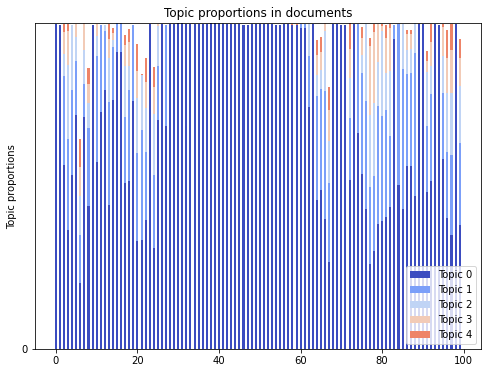

In [36]:
plt.figure(figsize=(8,6))
idx_D = np.arange(D)   # x-axis locations
idx_D=np.arange(100) # max 100 documents
bar_width = 0.5
plots = []
height_cumulative = np.zeros(max(idx_D)+1)

idx = np.argsort(-topic_proportions[:max(idx_D)+1])[:,:5] # order the first 5 topics for each document
for kk in range(5): # max 10 topics to visualize
    color = plt.cm.coolwarm(kk/5, 1)
    if kk==0:
        p = plt.bar(idx_D, topic_proportions[idx_D, idx[:,kk]], bar_width, color=color)
    else:
        p = plt.bar(idx_D, topic_proportions[idx_D, idx[:,kk]], bar_width, bottom=height_cumulative, color=color)
    height_cumulative += topic_proportions[idx_D, idx[idx_D,kk]]
    plots.append(p)
plt.ylim((0, 1))  # proportions sum to 1
plt.ylabel('Topic proportions')
plt.title('Topic proportions in documents')
plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic {}'.format(kk) for kk in range(n_topics)]
plt.legend([p[0] for p in plots], topic_labels)
plt.show()

### Visualize HeatMap

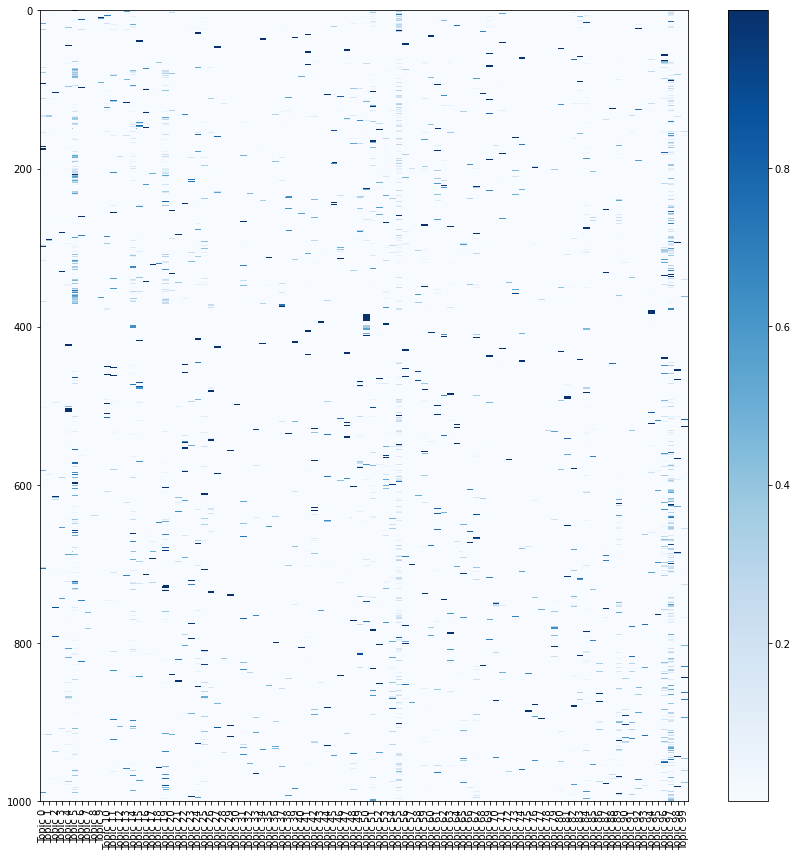

In [37]:
plt.figure(figsize=(12,12))
plt.pcolor(topic_proportions, norm=None, cmap='Blues')
topic_labels = ['Topic {}'.format(kk) for kk in range(n_topics)]
plt.xticks(np.arange(topic_proportions.shape[1])+0.5, topic_labels);
plt.gca().invert_yaxis()
plt.xticks(rotation=90)
plt.colorbar()
plt.tight_layout()
plt.show()

### Weighted impact of topic over documents.


In [38]:
topic_impact=topic_proportions.sum(axis=0)
most_impactful_topics=np.argsort(-topic_proportions.sum(axis=0))

Visualize least impactful topics

In [39]:
n_max=10
for t in most_impactful_topics[-5:]:
    idx = np.argsort(-topics[t,:])
    print_str = ''
    main_words_in_this_topic=list(np.concatenate([df_voc.iloc[idx[nn]].values for nn in range(n_max)]))
#     a=list(np.concatenate(a))
    print(main_words_in_this_topic)
    print()

['zzz_dongba', 'zzz_container', 'zzz_giant', 'culture', 'zzz_lijiang', 'zzz_jim_fassel', 'scriptures', 'deck', 'chinese', 'zzz_royal_canadian']

['zzz_butler', 'clam', 'zzz_mark_zandi', 'supposed', 'smooth', 'inch', 'occasionally', 'mushroom', 'thyme', 'shell']

['zzz_chairman', 'flooring', 'zzz_america', 'dome', 'chain', 'acquired', 'zzz_britain', 'expertise', 'partnership', 'undoubtedly']

['nap', 'sleep', 'zzz_napping', 'brain', 'body', 'afternoon', 'caffeine', 'workday', 'wake', 'sleepy']

['jumped', 'gained', 'zzz_brokerage', 'swing', 'zzz_jds_uniphase', 'opening', 'led', 'averages', 'broad', 'zzz_minnesota_mining']



Visualize documents containing the least impactful topic.

In [40]:
t_least=most_impactful_topics[-1]
d_least=np.argsort(-topic_proportions[:,t_least])[0]

In [41]:
topic_proportions[d_least,t_least]

0.2545067570467018

t_least : topic least impactful

In [42]:
idx = np.argsort(-topics[t_least,:])
main_words_in_this_topic=list(np.concatenate([df_voc.iloc[idx[nn]].values for nn in range(50)]))
print(main_words_in_this_topic)
print()

['jumped', 'gained', 'zzz_brokerage', 'swing', 'zzz_jds_uniphase', 'opening', 'led', 'averages', 'broad', 'zzz_minnesota_mining', 'slid', 'zzz_ge_capital', 'registered', 'turvy', 'thesis', 'zzz_alcoa', 'manufacturer', 'consistent', 'difficult', 'zzz_intel', 'pie', 'quotes', 'measures', 'approval', 'boston', 'zzz_genentech', 'backup', 'road', 'zzz_jefferies', 'bell', 'connote', 'volatility', 'swath', 'stayed', 'topsy', 'trader', 'zzz_jenrette', 'component', 'bumpy', 'unwinding', 'dramatic', 'reversed', 'weakness', 'zzz_biogen', 'drag', 'fiber', 'cyclical', 'zzz_millennium_pharmaceutical', 'nonbank', 'delaying']



d_least : document including topic least impactful

In [43]:
df_sample_d=df[df.docId==d_least+1].sort_values(by=['wordFreq'],ascending=False)
main_wordsId_in_this_doc=df_sample_d.iloc[:100]['wordId'].values
main_words_in_this_doc=np.concatenate([df_voc.iloc[w].values for w in main_wordsId_in_this_doc])
main_words_in_this_doc

array(['stockade', 'indexed', 'marketability', 'fella',
       'zzz_nasdaq_composite', 'pointe', 'ratification', 'percentage',
       'roseanne', 'companion', 'shareware', 'jumper', 'gainer',
       'interested', 'termed', 'technophiles', 'zzz_american_express_co',
       'zzz_bromgard', 'financially', 'swinger', 'lede', 'industrialist',
       'inveterate', 'set', 'risen', 'recordable', 'raised', 'openly',
       'performances', 'pricetag', 'companywide', 'zzz_yahoo_com',
       'expecting', 'capabilities', 'bondage', 'zzz_dow_chemical',
       'zzz_cmgi_field', 'zzz_federal_reserve_bank',
       'zzz_dow_jones_industrial_average', 'zzz_j_p_morgan_chase',
       'zzz_jean', 'averaged', 'zzz_merrimack', 'bigamy',
       'zzz_general_electric_co', 'sensitively', 'zzz_jens_ludwig',
       'sharpen', 'zzz_jefferson', 'shedding', 'shortage', 'sawdust',
       'shortness', 'slide', 'zzz_internet_access', 'selloff',
       'zzz_manufacturing_co', 'runaround', 'zzz_lufkin_daily_new',
       '

Visualize most impactful topics

In [44]:
max_topics=most_impactful_topics[:5]
n_max = 10
for kk in max_topics:
    print('+ Topic ' + str(kk) + ':')
    idx = np.argsort(-topics[kk,:])
    print_str = ''
    main_words_in_this_topic=list(np.concatenate([df_voc.iloc[idx[nn]].values for nn in range(n_max)]))
#     a=list(np.concatenate(a))
    print(main_words_in_this_topic)
    print()

+ Topic 97:
['company', 'computer', 'companies', 'million', 'problem', 'system', 'business', 'percent', 'billion', 'plan']

+ Topic 5:
['game', 'team', 'season', 'play', 'yard', 'games', 'player', 'win', 'point', 'coach']

+ Topic 55:
['book', 'show', 'film', 'family', 'home', 'night', 'music', 'crowd', 'celebration', 'father']

+ Topic 19:
['zzz_bill_belichick', 'zzz_bill_parcell', 'jet', 'team', 'coach', 'patriot', 'head', 'player', 'season', 'zzz_giant']

+ Topic 96:
['campaign', 'candidates', 'zzz_al_gore', 'presidential', 'zzz_new_hampshire', 'republican', 'election', 'political', 'president', 'candidate']

